# grids

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import bathy_smoother
import sys
src_dir = os.environ.get('srcdir')
sys.path.append(src_dir)
from features.log_progress import log_progress
from features.mask_roms_uvp import uvp_masks
import numpy as np



lpsolve55.so not found.
Linear programming method will not be available.


In [73]:
path = os.path.join(os.environ.get('rawdir'),'gdata','hr_exp','waom2_grd_fixed.nc')
grd = xr.open_dataset(path)

In [23]:
RoughMat = bathy_smoother.bathy_tools.RoughnessMatrix(grd10.h.values,grd10.mask_rho.values)
print('Max Roughness value is: ', RoughMat.max())

Max Roughness value is:  0.300000041723


<IPython.core.display.Javascript object>


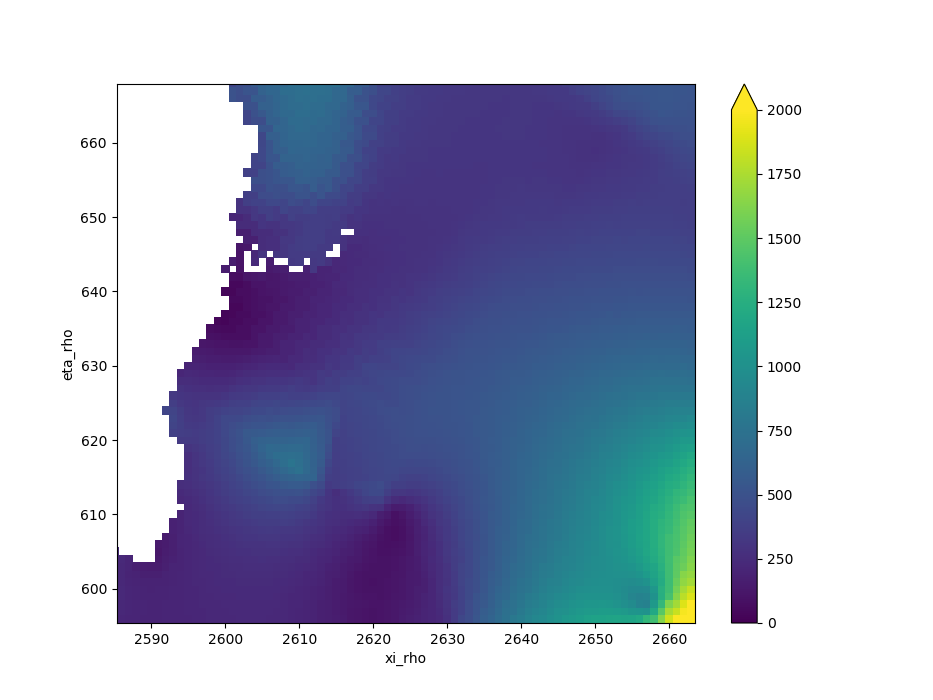

In [79]:
%matplotlib notebook
plt.close()
(grd.h).where(grd.mask_rho).plot(size=7,vmax=2000,vmin=0)
plt.show()

In [75]:
#fixing the fast ice around totten
mask = grd.zice.values[600:850,2550:2750]>-10
grd.zice.values[600:850,2550:2750][mask] = 0

In [80]:

bed = grd.h.values.copy()
ice = grd.zice.values.copy()
#set bed minimum depth to 10 cm
bed[bed<0.1]= 0.1
#set ice draft at these places to zero 
ice[bed<0.1] = 0.0

#set water column thickness to a small positive value (ROMS don't like when bed = ice draft)
wct = (bed+ice).copy()
ice[wct<=0.1] = -bed[wct<=0.1] + 0.1

grd.h.values = bed
grd.zice.values = ice


mask = np.ones_like(bed) 
mask[(wct<20.0)]=0
mask[grd.mask_rho==0]=0

umask,vmask,pmask = uvp_masks(mask)

grd.mask_rho.values = mask
grd.mask_u.values = umask
grd.mask_v.values = vmask
grd.mask_psi.values = pmask

In [81]:
out_path = os.path.join(os.environ.get('rawdir'),'gdata','hr_exp','waom2_grd_tottenFixed.nc')
grd.to_netcdf(out_path,unlimited_dims='bath')